### Задача A-Полиномиальная хеш-функция
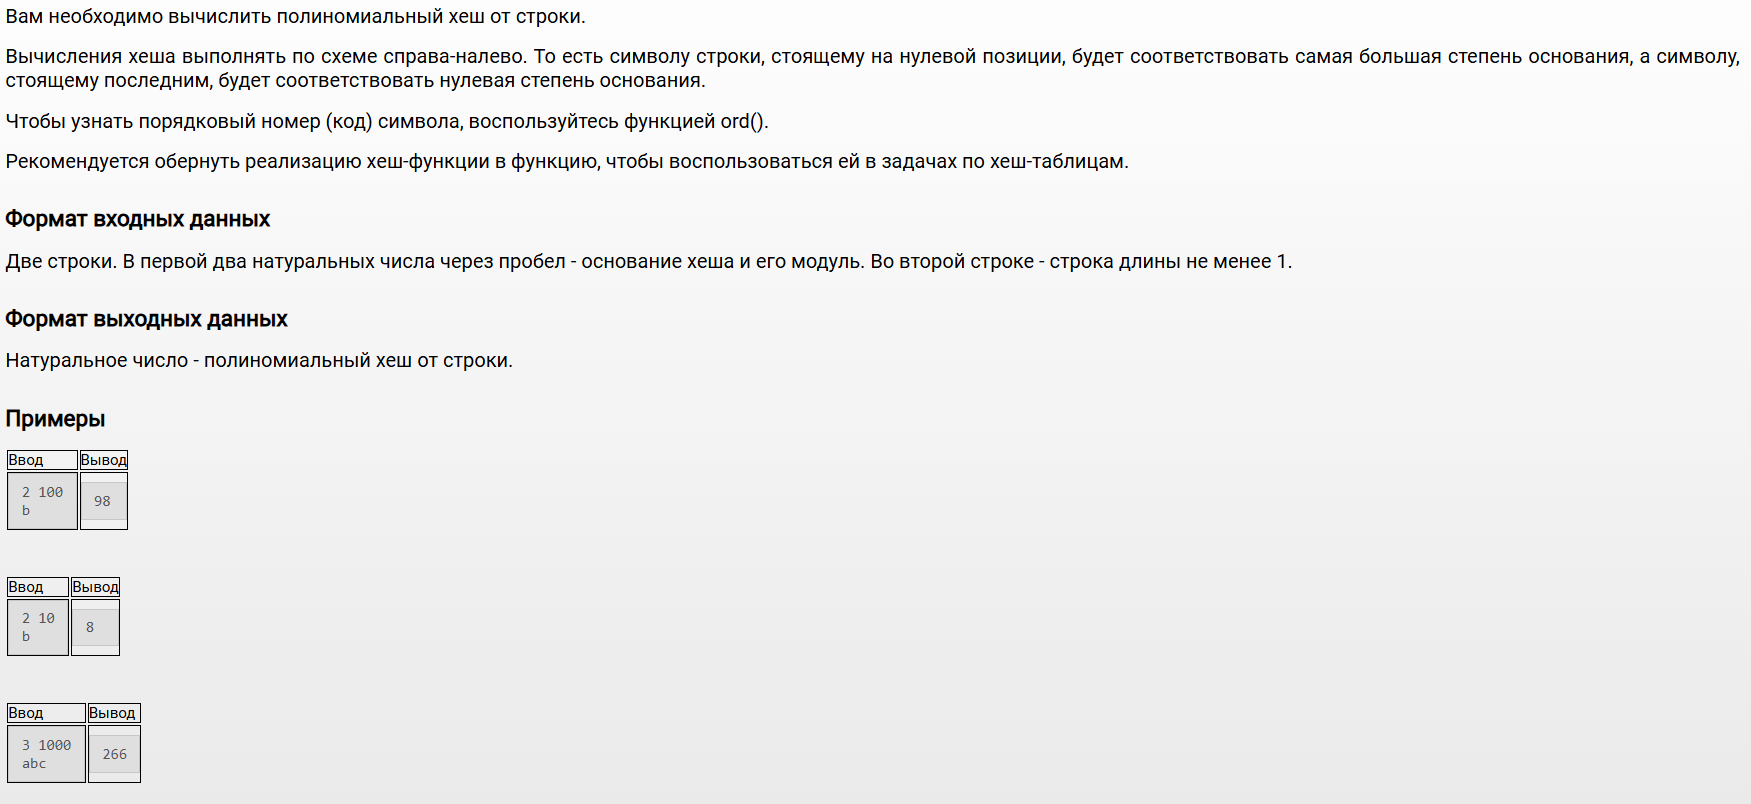

# Контест 2 - хэш-функции

### Задача A-Полиномиальная хеш-функция
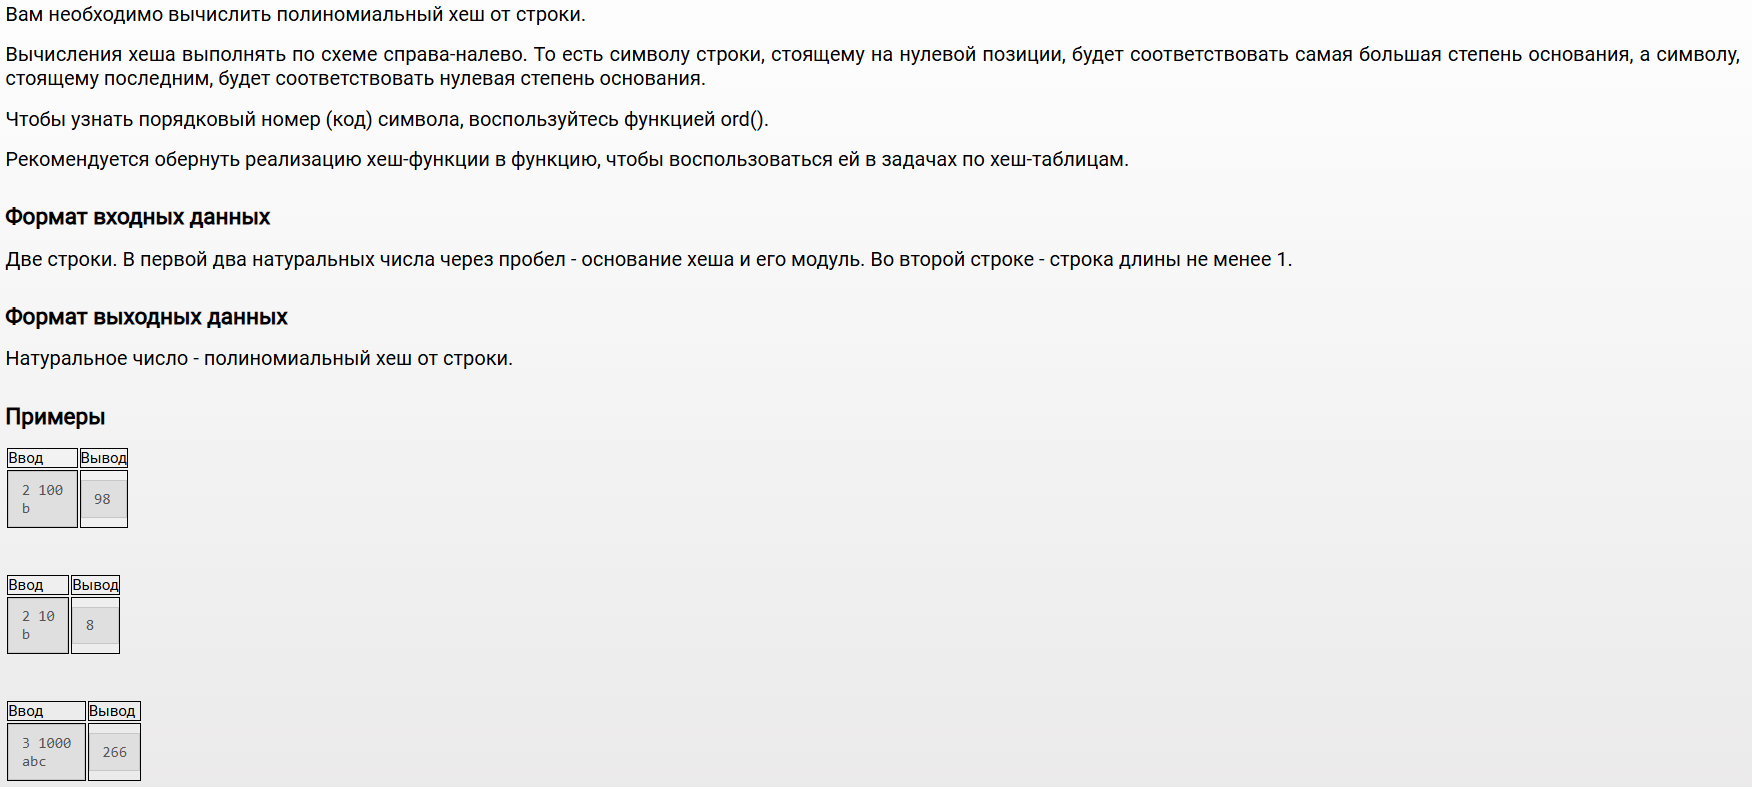

In [ ]:
base, module = list(map(int, input().split()))
s = input()
polynom = 0
for i in range(len(s)):
    polynom += ord(s[i])*base**(len(s)-i-1)
hash = polynom % module
print(hash)

### Задача B-Ассоциативный массив на хеш-таблице с цепочками - Добавление элемента
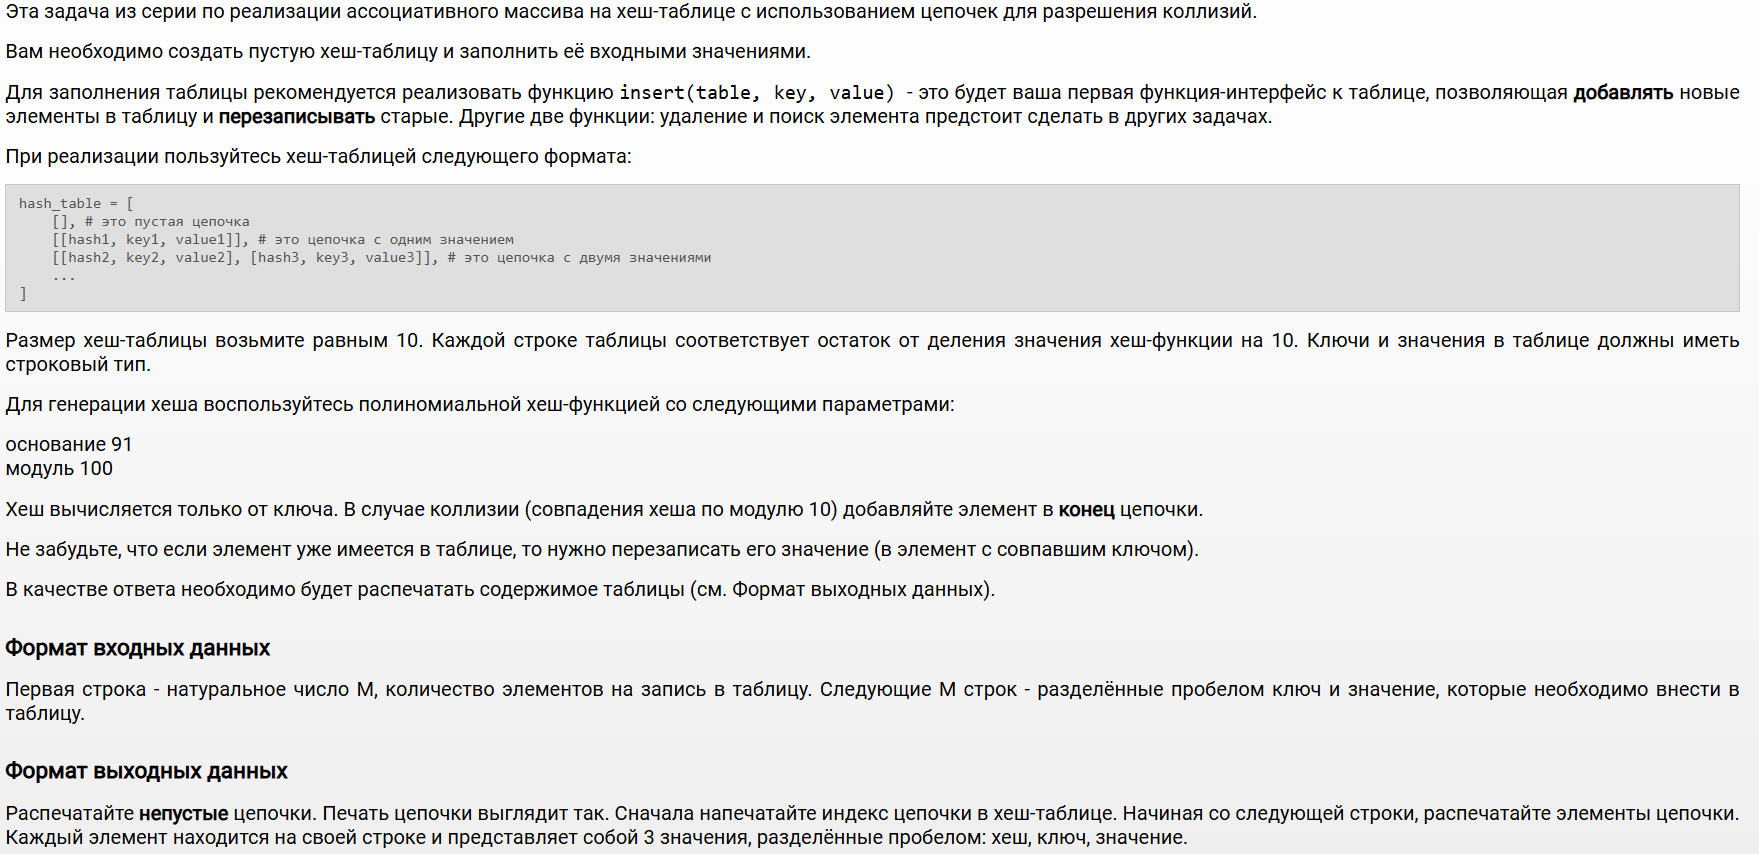
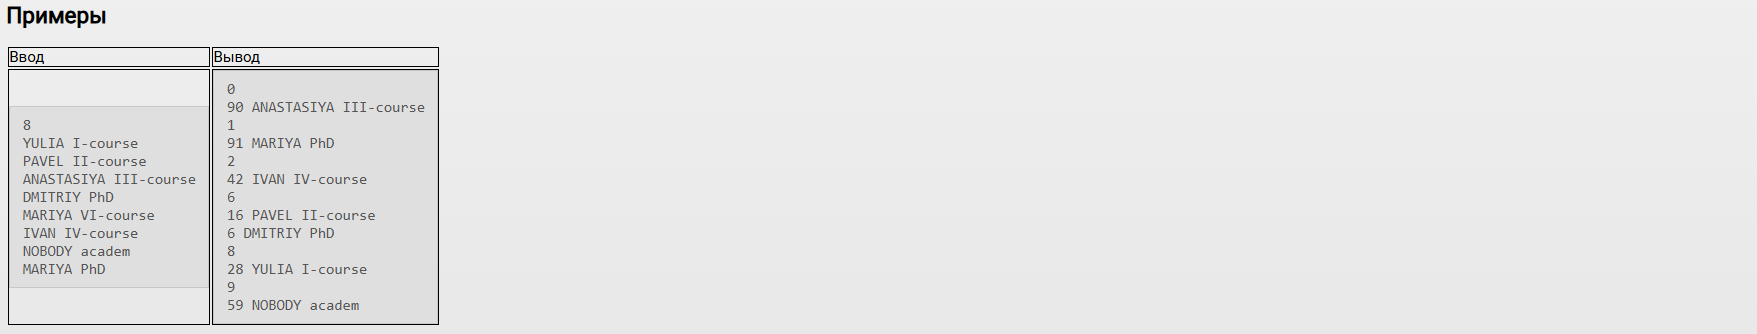

In [ ]:
m = int(input())
hash_table = [[] for _ in range(10)]

def polynom_hash(base, module, s):
    polynom = 0
    for i in range(len(s)):
        polynom += ord(s[i])*base**(len(s)-i-1)
    hash = polynom % module
    return hash

def insert(key, value):
    h = polynom_hash(91, 100, key)
    n = h % 10
    flag = 0
    
    if len(hash_table[n]) != 0:
        for i in range(0, len(hash_table[n])):
            if hash_table[n][i][1] == key:
                hash_table[n][i][2] = value
                flag = 1
    if flag == 0:
        hash_table[n].append([h, key, value])
    return

for i in range(m):
    key, value = input().split()
    insert(key, value)

for i in range(10):
    if hash_table[i] != []:
        print(i)
        for j in range(len(hash_table[i])):
            print(*hash_table[i][j])

### Задача C-Ассоциативный массив на хеш-таблице с цепочками - Поиск элемента
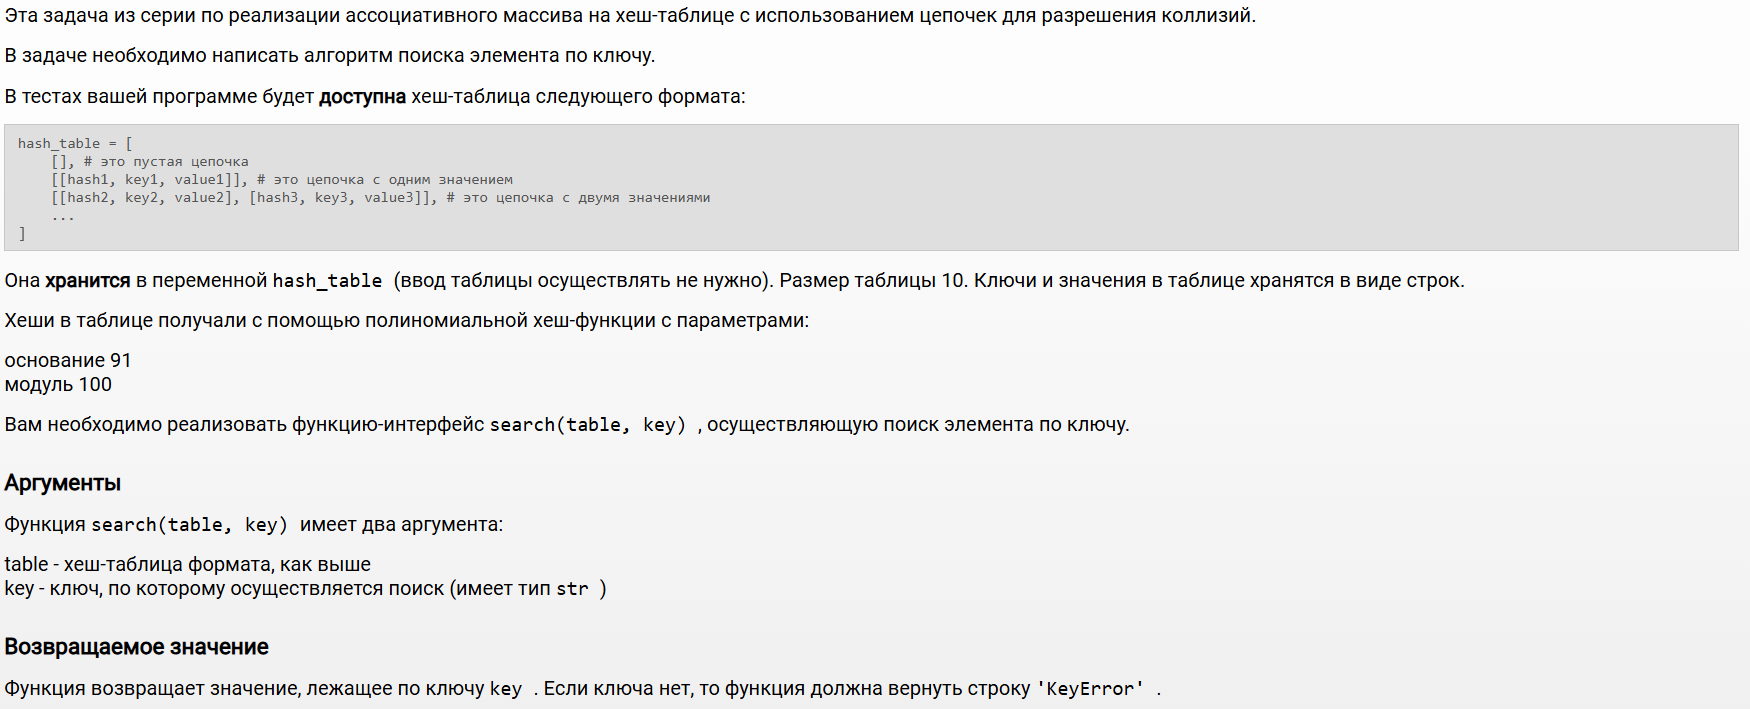

In [76]:
def polynom_hash(base, module, s):
    polynom = 0
    for i in range(len(s)):
        polynom += ord(s[i])*base**(len(s)-i-1)
    hash = polynom % module
    return hash
    
def search(table, key):
    hash_value = polynom_hash(91, 100, key) % 10
    for i in table[hash_value]:
        if i[1] == key:
            return i[2]
    return 'KeyError'

### Задача D-Хеш-таблица с цепочками - Удаление элемента
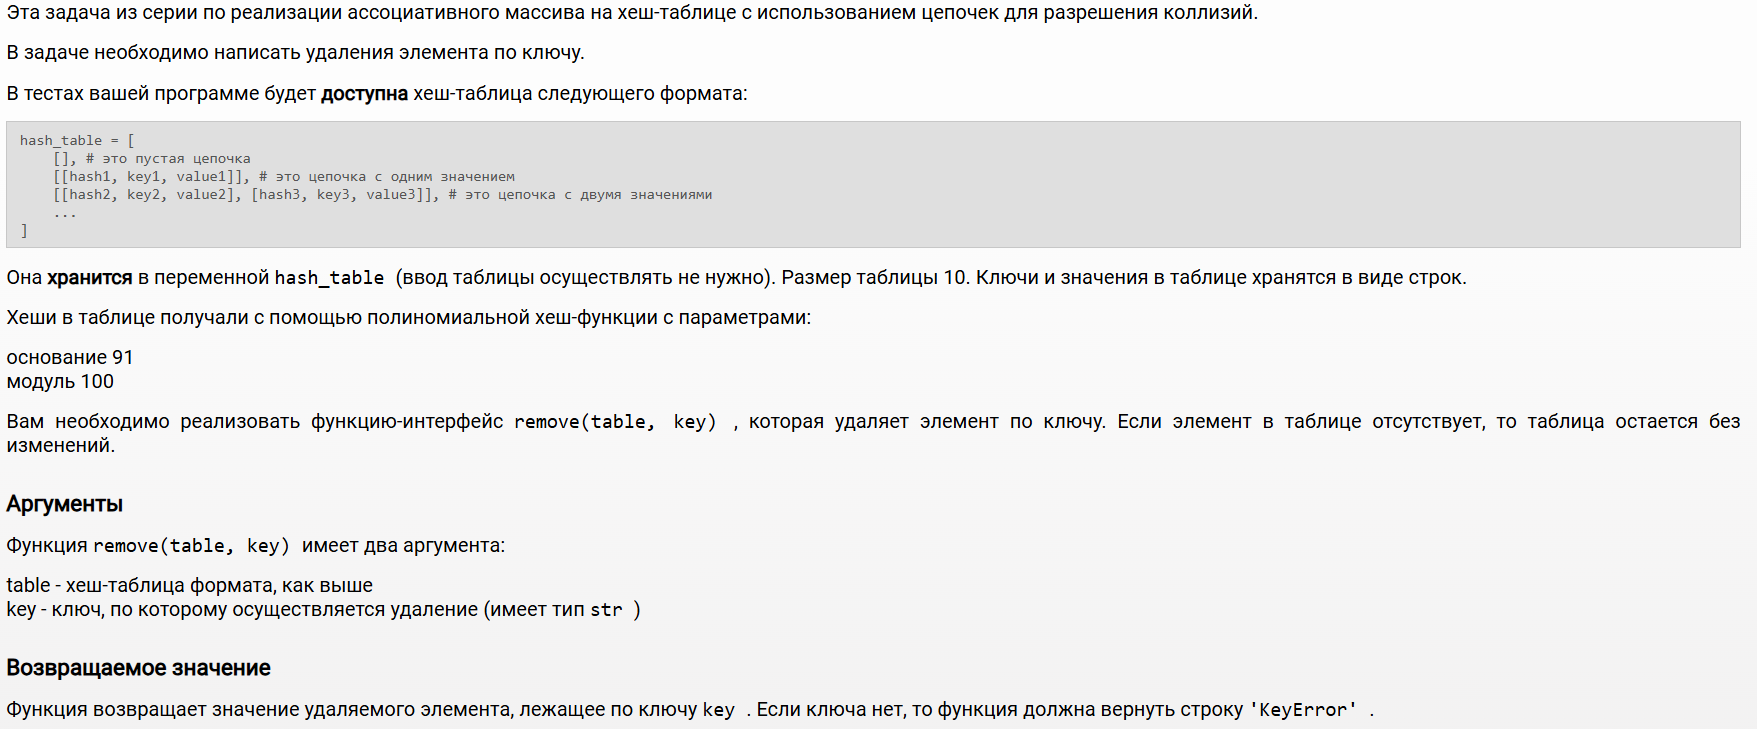

In [77]:
def polynom_hash(base, module, s):
    polynom = 0
    for i in range(len(s)):
        polynom += ord(s[i])*base**(len(s)-i-1)
    hash = polynom % module
    return hash
    
def remove(table, key):
    hash_value = polynom_hash(91, 100, key) % 10
    for i in range(len(table[hash_value])):
        if table[hash_value][i][1] == key:
            k = table[hash_value][i][2]
            table[hash_value].pop(i)
            return k
    return 'KeyError'

### Задача E-Алгоритм Рабина-Карпа
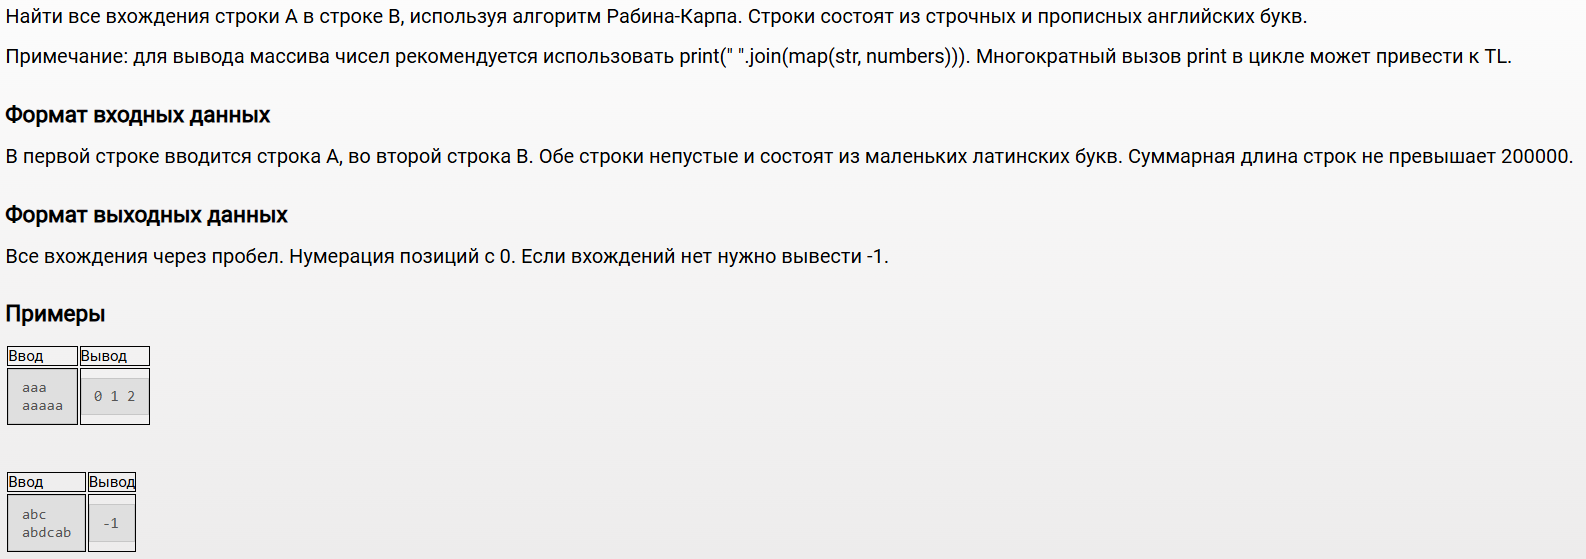

In [ ]:
def code(symbol):
    code = ord(symbol) - ord('a') + 1
    return code


def polynom_hash(string):
    values = [0]
    for elem in string:
        values.append(((values[-1]*base) + code(elem)) % mod)
    return values

base = 91
mod = 10000007

A = input()
B = input()
hash_A = polynom_hash(A)[-1]
hash_B = polynom_hash(B)
indexes = []
tmp = base**len(A) % mod

for i in range(0, -len(A) + len(B) + 1):
    if (hash_A == (hash_B[i + len(A)] - hash_B[i]*tmp) % mod):
        indexes.append(i)
        
if indexes:
    print(" ".join(map(str, indexes)))
else:
    print(-1)

# Контест 3 Стэк, очередь, куча

### A-Покер Чапаева
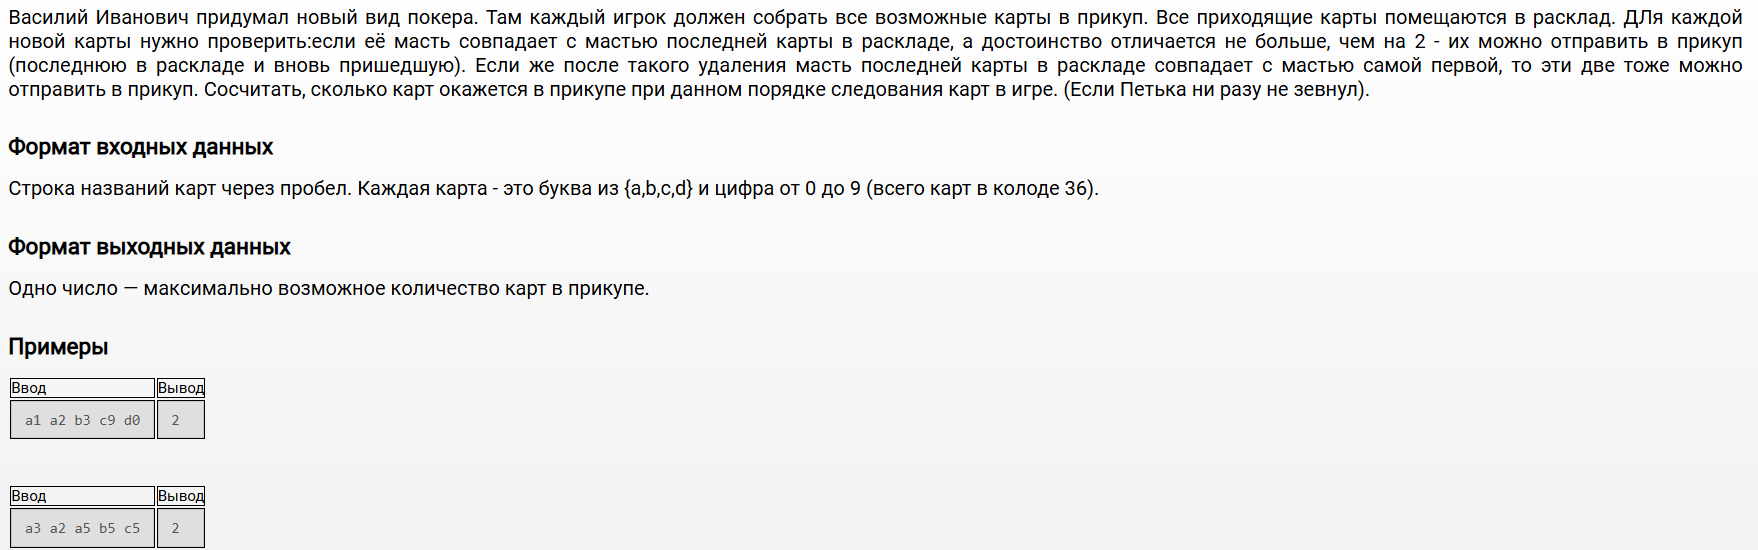

In [ ]:
from collections import deque
cards = input().split()
d = deque()
count = 0
d.append(cards[0])

for i in range(1, len(cards)):
    
    if len(d) < 2:
        d.append(cards[i])
        continue
        
    elif d[len(d)-1][0] == d[len(d)-2][0] and abs(int(d[len(d)-1][1]) - int(d[len(d)-2][1])):
        count += 2
        d.popleft()
        d.popleft()
        if len(d) > 1 and d[0][0] == d[len(d)-1][0]:
            count += 2
            d.pop()
            d.popleft()
            
    d.append(cards[i])

print(count)

### B-Бедная секретарша
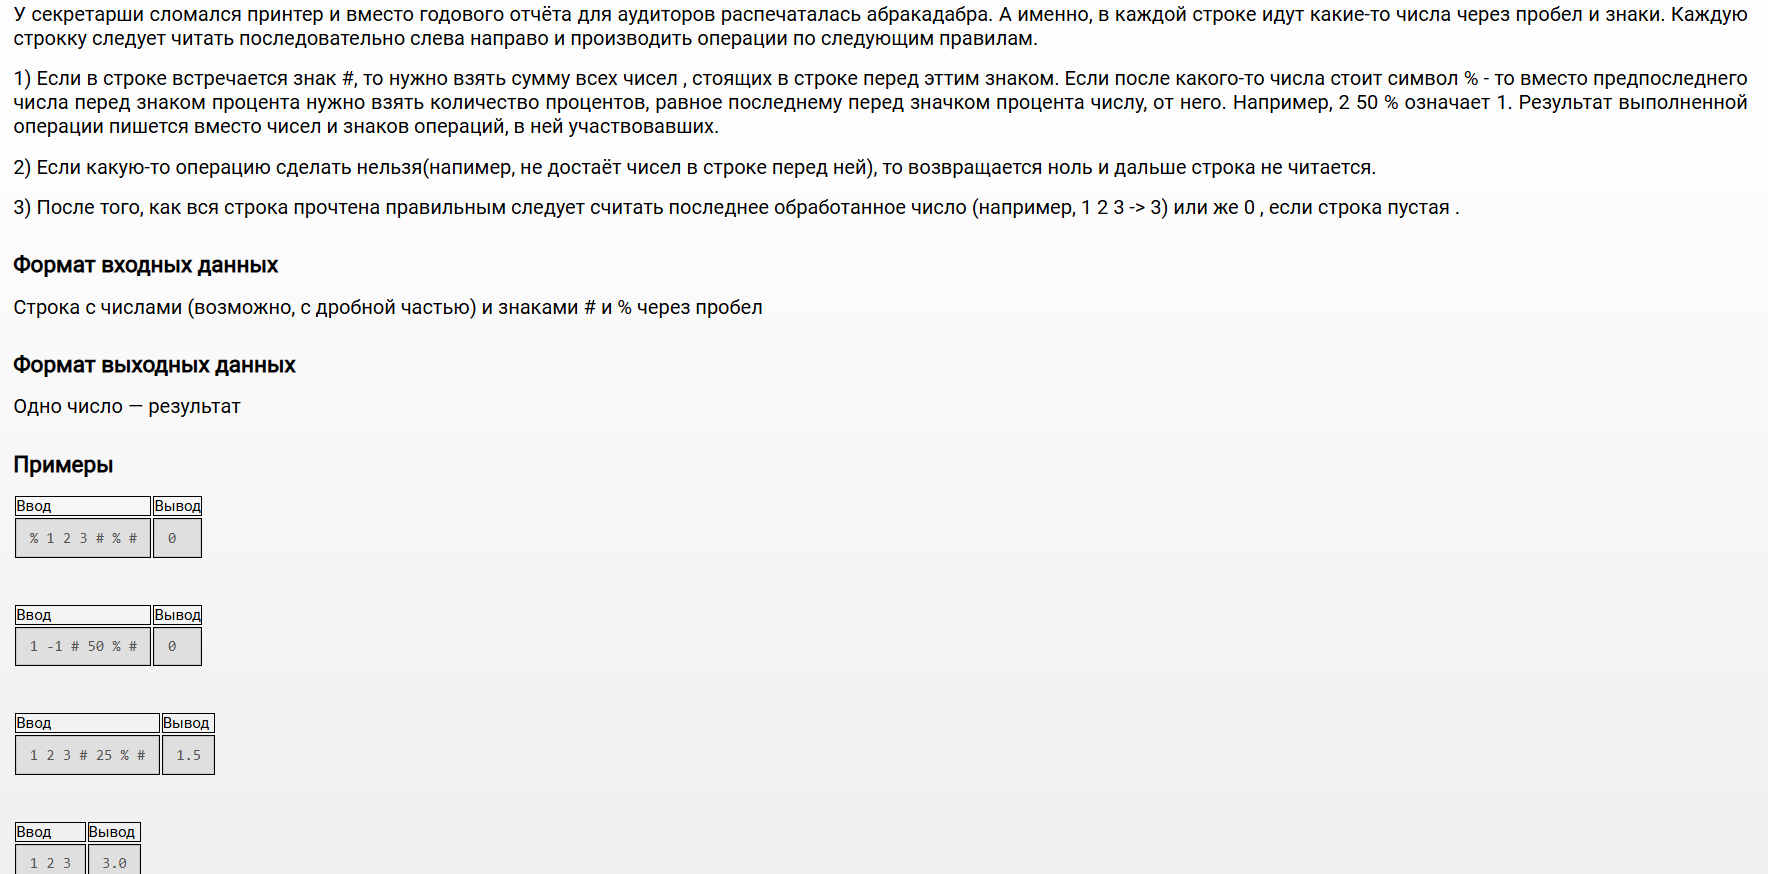

In [ ]:
def line(line):
    elements = line.split()
    stack = []
    
    for element in elements:
        
        if element.replace('.', '', 1).isdigit():
            stack.append(float(element))
            
        elif element == '#':
            if len(stack) < 1:
                return 0.0
            total = sum(stack)
            stack = [total]
            
        elif element == '%':
            if len(stack) < 2:
                return 0.0
            percent_value = stack.pop()
            base_value = stack.pop()
            new_value = base_value * (percent_value/100)
            stack.append(new_value)
            
        else:
            return 0.0

    return stack[-1] if stack else 0.0

s = input()
print(line(s))

### C-Обратная польская запись
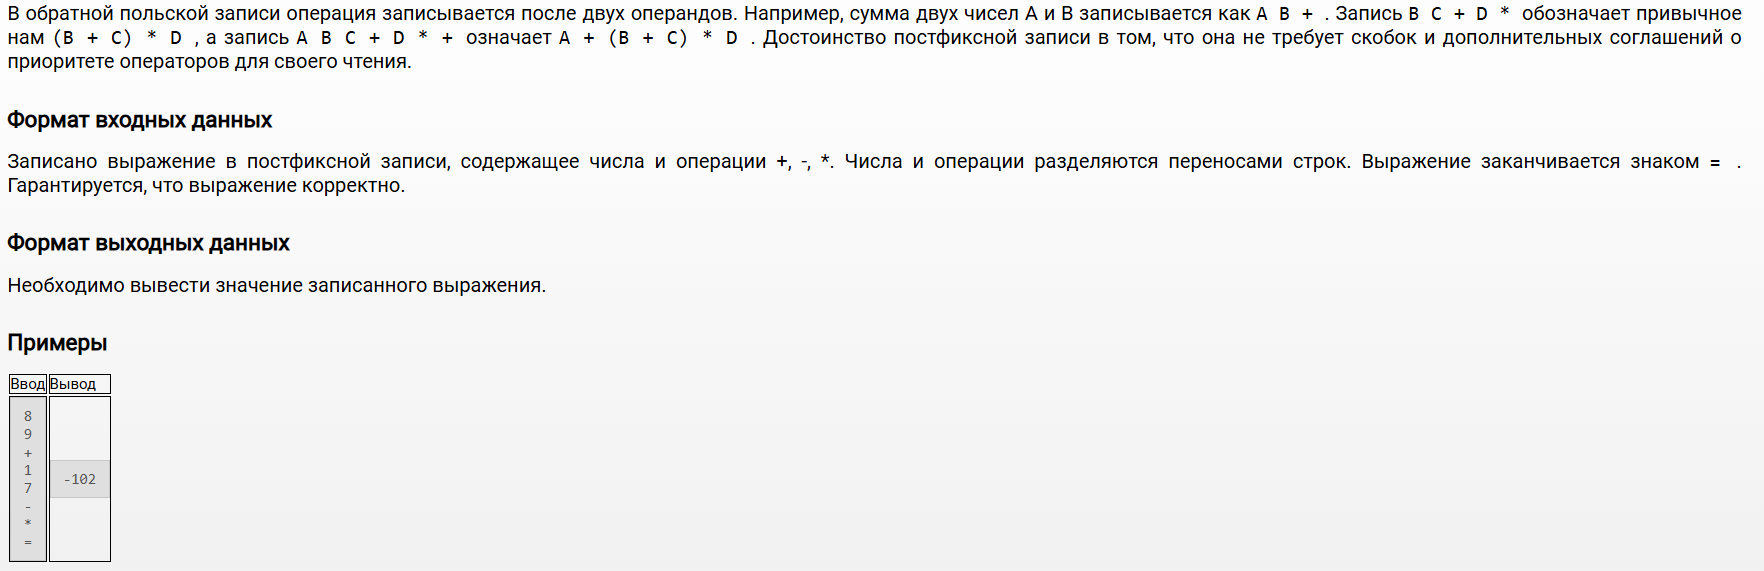

In [ ]:
stack = []
n = 0

def is_number(str):
    try:
        int(str)
        return True
    except ValueError:
        return False
    
while n != '=':
    n = input()
    if is_number(n):
        stack.append(int(n))
    elif n == '+':
        b = stack.pop()
        a = stack.pop()
        stack.append(a+b)
    elif n == '-':
        b = stack.pop()
        a = stack.pop()
        stack.append(a-b)
    elif n == '*':
        b = stack.pop()
        a = stack.pop()
        stack.append(a*b)

print(*stack)

### D-Построение кучи
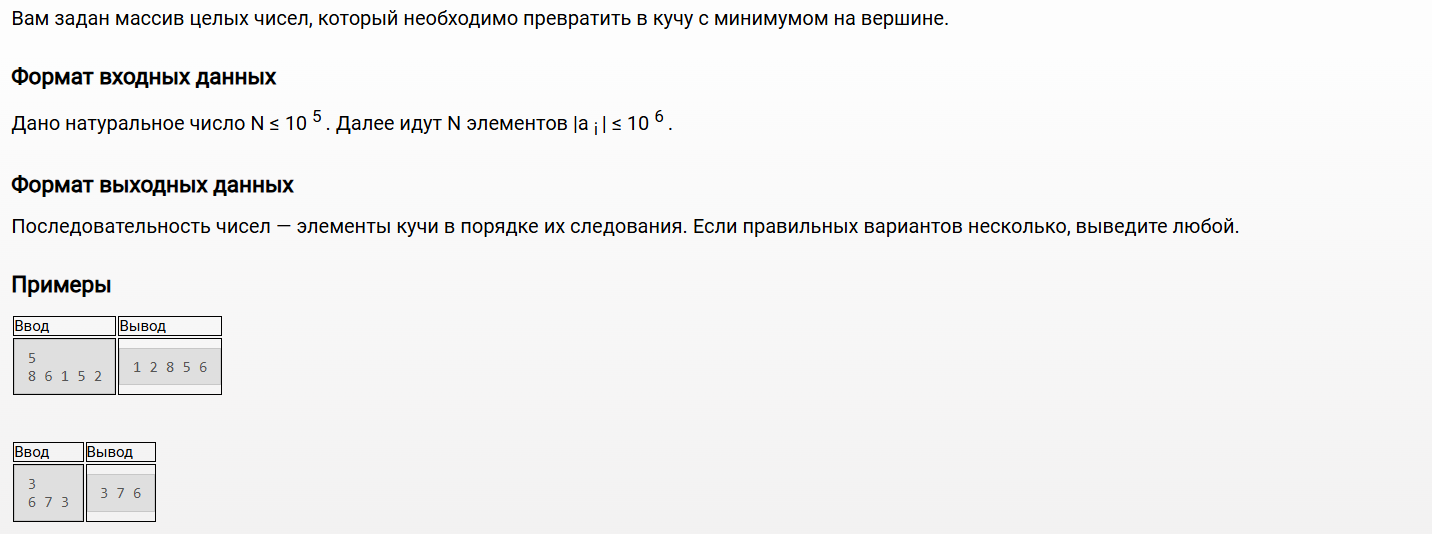

In [ ]:
def push(h, element):
    h.append(element)
    shift_up(h, len(h) - 1)

def shift_up(h, i):
    if i == 0:
        return
    p = (i - 1) // 2

    if h[i] < h[p]:
        h[i], h[p] = h[p], h[i]
        shift_up(h, p)

n = int(input())
s = list(map(int, input().split()))
h = []
for i in s:
    push(h, i)

print(*h)

### E-Сортировка кучей
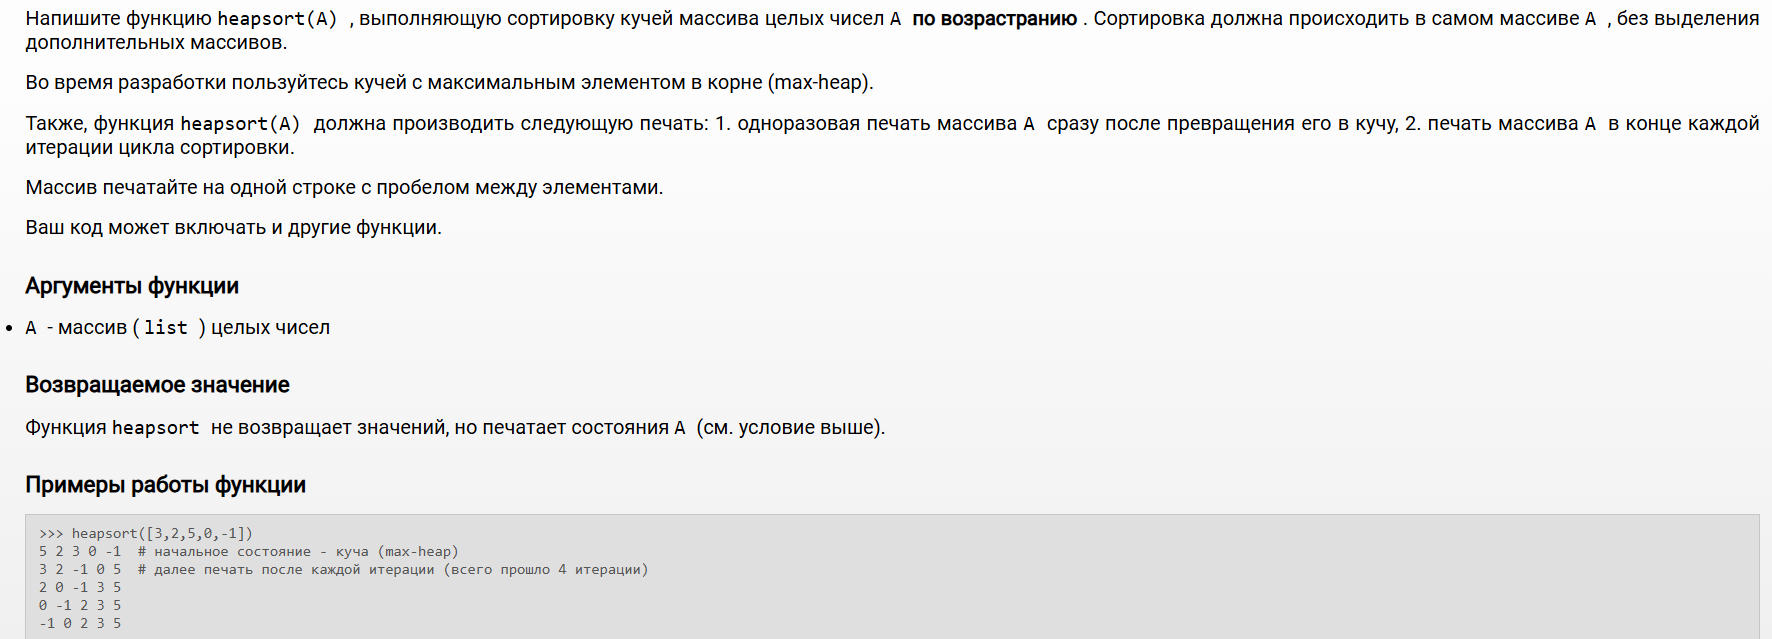

In [ ]:
def heapify(arr,n,i):
    maximum = i
    left = 2*i + 1
    right = 2*i + 2
    if left < n and arr[maximum] < arr[left]:
        maximum = left
    if right < n and arr[maximum] < arr[right]:
        maximum = right
    if maximum != i:
        arr[maximum], arr[i] = arr[i], arr[maximum]
        heapify(arr, n, maximum)

def heapsort(arr):
    n = len(arr)
    for i in range(n,-1,-1):
        heapify(arr,n,i)
    print(*arr)
    for i in range(n-1,0,-1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
        print(*arr)

# Контест 4 Двоичные деревья поиска

### Задача A - Дерево - проверка корректности
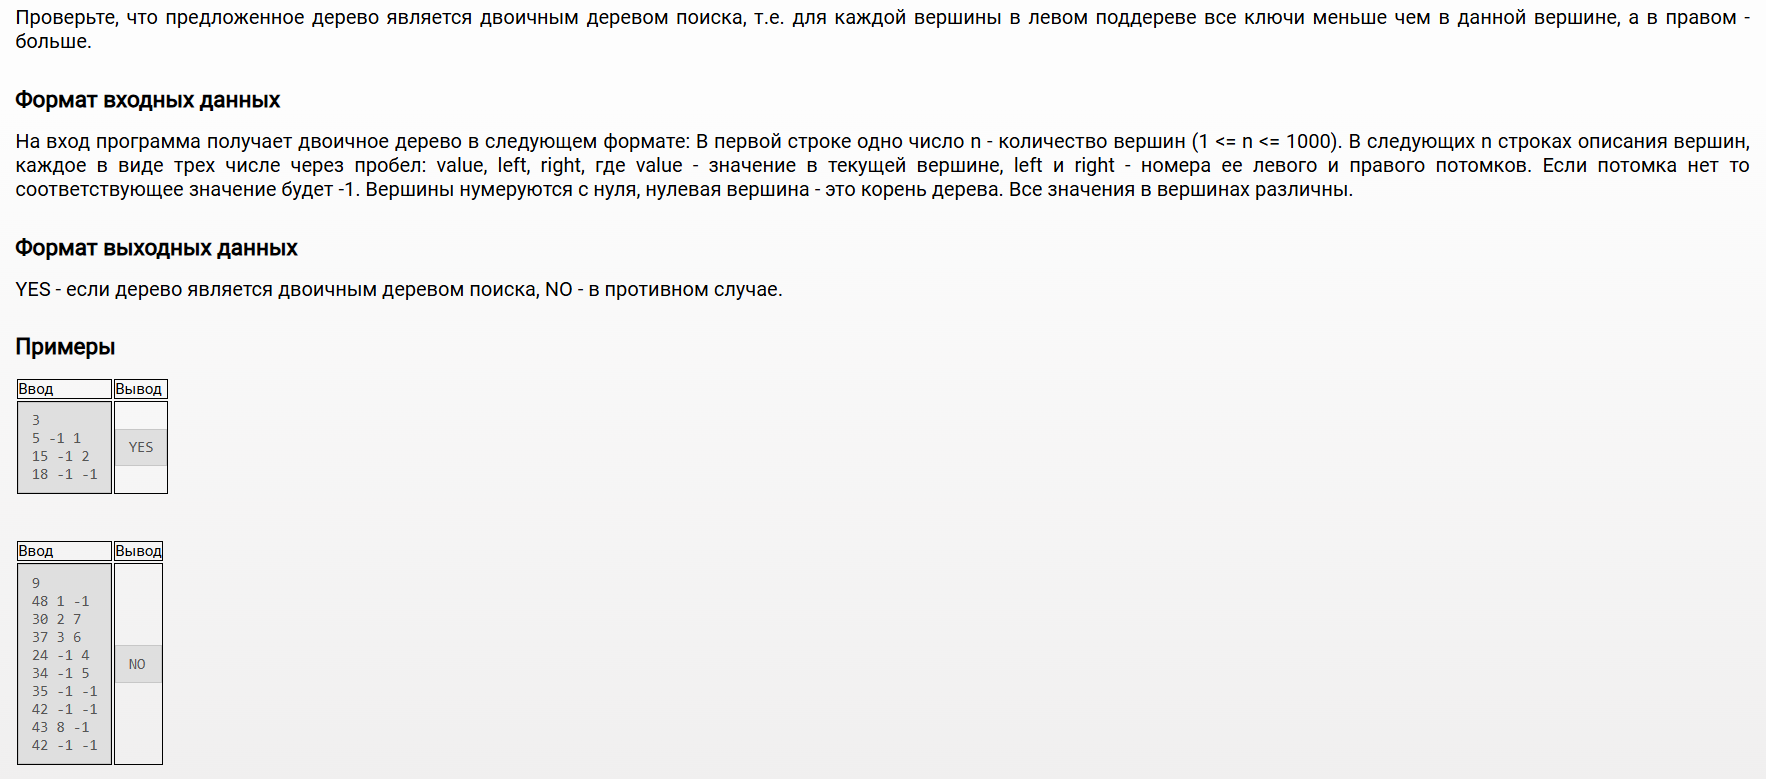

In [ ]:
def BinTree(arr, index, min_val = float('-inf'), max_val = float('+inf')):
    if index == -1:
        return True
    elif max_val < arr[index][0] or arr[index][0] < min_val:
        return False
    else:
        return BinTree(arr, arr[index][1], min_val, arr[index][0]) and BinTree(arr, arr[index][2], arr[index][0], max_val)
    
n = int(input())
arr = []
for i in range(n):
    arr.append(list(map(int, input().split())))

if BinTree(arr, 0):
    print('YES')
else:
    print('NO')

### Задача B - Высота дерева
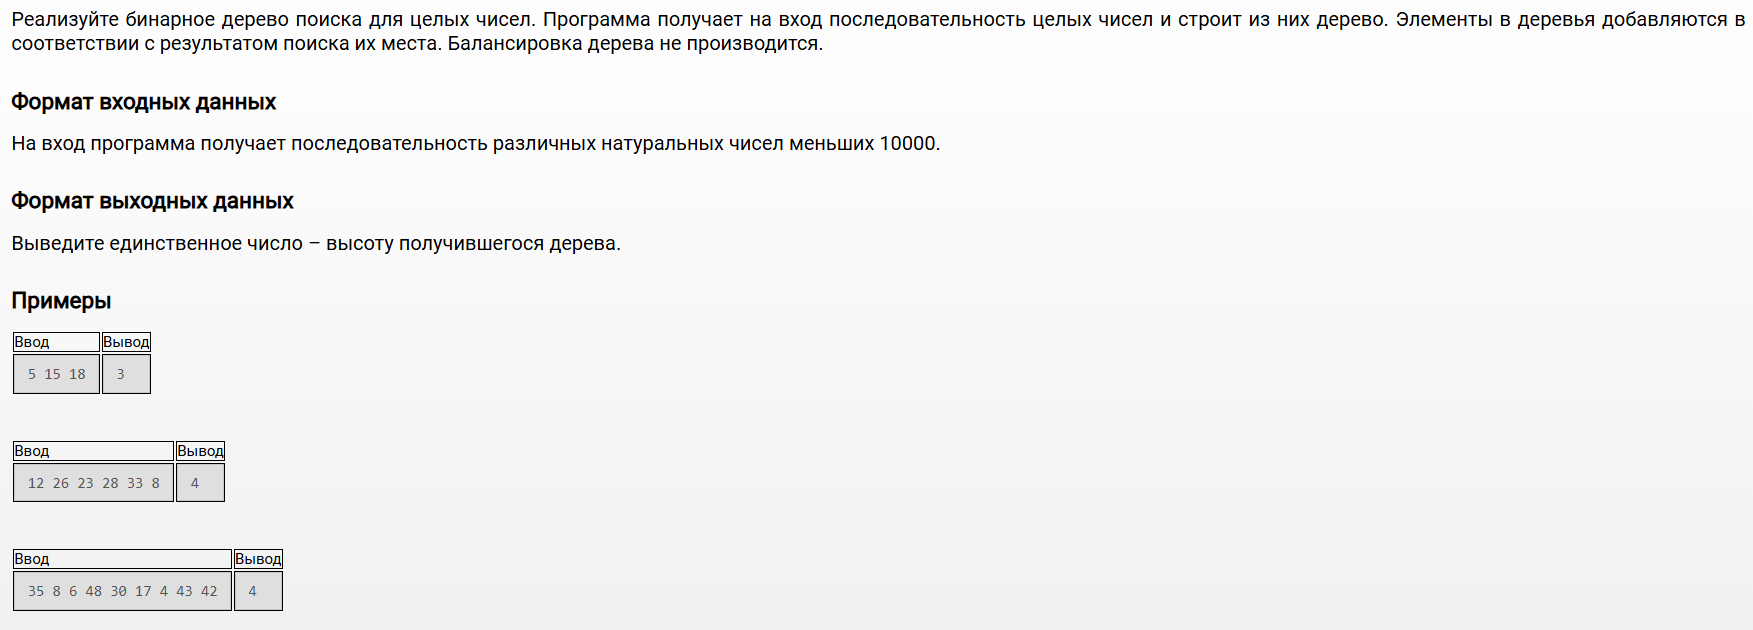

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = self.right = None

    def add(self, data):
        if data > self.data:
            if self.right is None:
                self.right = Node(data)
            else:
                self.right.add(data)
        else:
            if self.left is None:
                self.left = Node(data)
            else:
                self.left.add(data)

    def __str__(self):
        return (
                (str(self.left) if self.left is not None else '')+
                f' {self.data}'+
                (str(self.right) if self.right is not None else '') )

class BinTree:
    def __init__(self):
        self.root = None

    def add(self, data):
        if self.root is None:
            self.root = Node(data)
        else:
            self.root.add(data)

    def height(self):
        return self._height_recursive(self.root)

    def _height_recursive(self, node):
        if node is None:
            return 0
        left_height = self._height_recursive(node.left)
        right_height = self._height_recursive(node.right)
        return max(left_height, right_height) + 1

    def __str__(self):
        return str(self) if self.root is not None else ''
    
if __name__ == "__main__":
    numbers = list(map(int, input().split()))
    tree = BinTree()
    for number in numbers:
        tree.add(number)
    print(tree.height())

### задача C - Дерево - листья
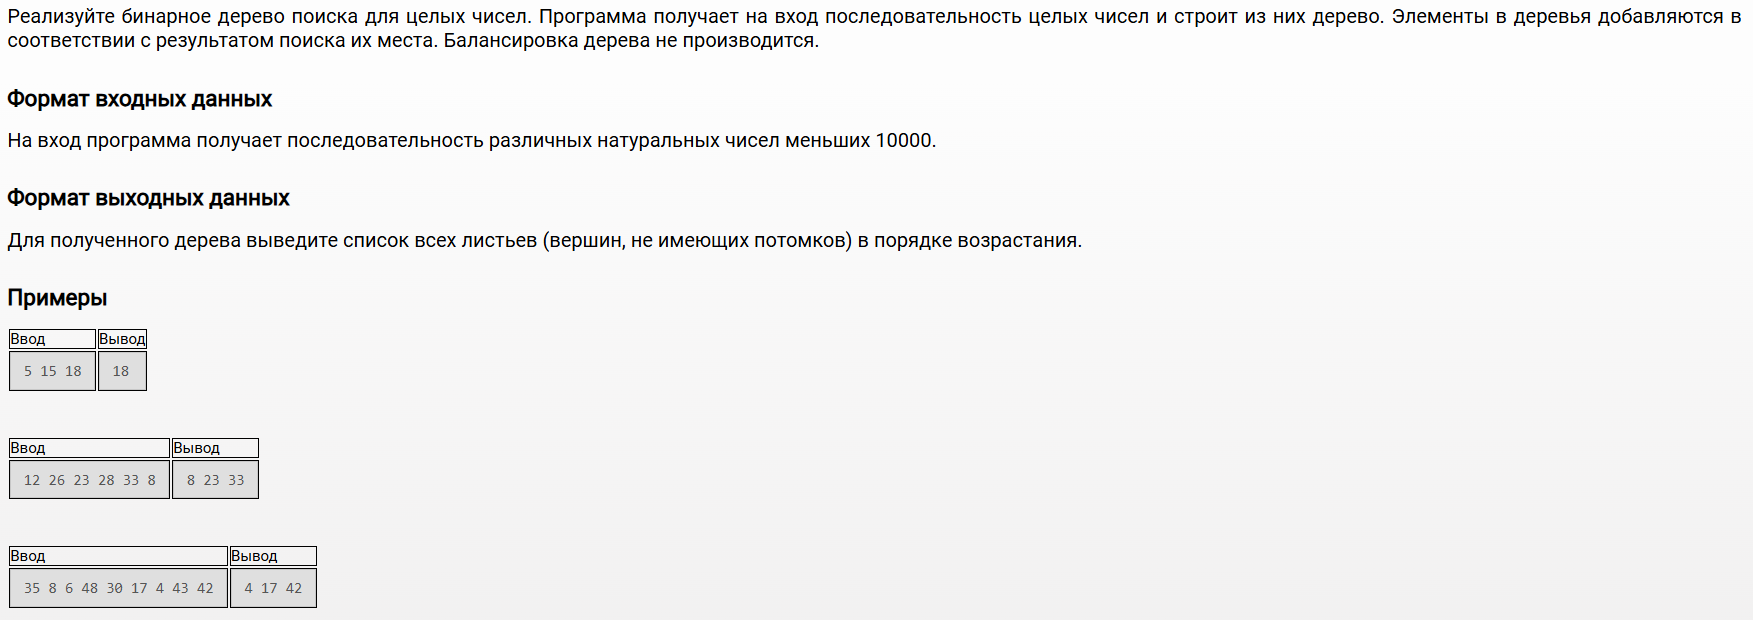

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = self.right = None

    def add(self, data):
        if data > self.data:
            if self.right is None:
                self.right = Node(data)
            else:
                self.right.add(data)
        else:
            if self.left is None:
                self.left = Node(data)
            else:
                self.left.add(data)

    def __str__(self):
        return (
                (str(self.left) if self.left is not None else '')+
                f' {self.data}'+
                (str(self.right) if self.right is not None else '') )

class BinTree:
    def __init__(self):
        self.root = None

    def add(self, data):
        if self.root is None:
            self.root = Node(data)
        else:
            self.root.add(data)

    def get_leaves(self):
        leaves = []
        self.get_leaves_recursive(self.root, leaves)
        leaves.sort()
        return leaves

    def get_leaves_recursive(self, node, leaves):
        if node is None:
            return
        if node.left is None and node.right is None:
            leaves.append(node.data)
        else:
            self.get_leaves_recursive(node.left, leaves)
            self.get_leaves_recursive(node.right, leaves)

    def __str__(self):
        return str(self) if self.root is not None else ''
    
if __name__ == "__main__":
    numbers = list(map(int, input().split()))
    tree = BinTree()
    for number in numbers:
        tree.add(number)
    leaves = tree.get_leaves()
    print(*leaves)

# Контест 5 - Односвяный список

### Задача A - Абстрактный одноступ
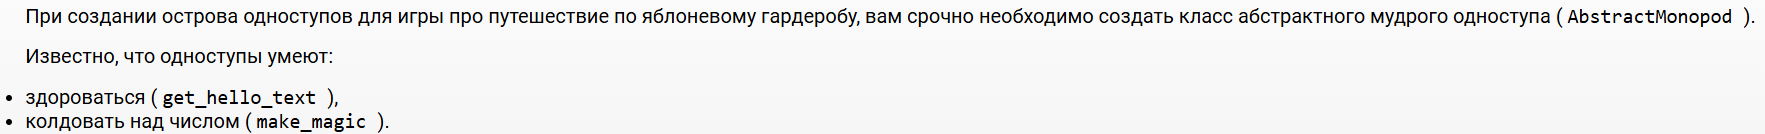

In [ ]:
import abc

class AbstractMonopod(abc.ABC):

    @abc.abstractmethod
    def get_hello_text(self) -> str:
        pass

    @abc.abstractmethod
    def make_magic(self, number: int) -> int:
        pass

### Задача B-Одноступы
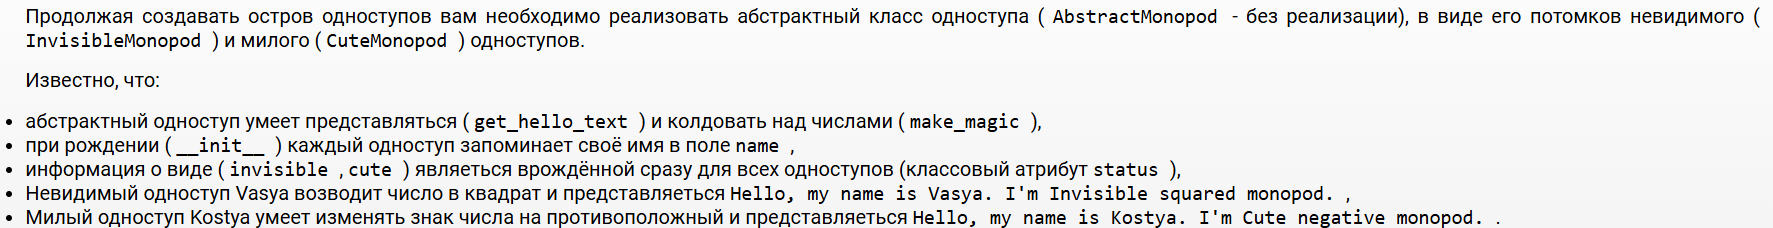

In [ ]:
from abc import ABC, abstractmethod

class AbstractMonopod(ABC):
    # Класс-атрибут
    status = None

    def __init__(self, name):
        self.name = name

    @abstractmethod
    def get_hello_text(self):
        pass

    @abstractmethod
    def make_magic(self, number):
        pass


class InvisibleMonopod(AbstractMonopod):
    status = "invisible"

    def get_hello_text(self):
        return f"Hello, my name is {self.name}. I'm Invisible squared monopod."

    def make_magic(self, number):
        return number ** 2


class CuteMonopod(AbstractMonopod):
    status = "cute"

    def get_hello_text(self):
        return f"Hello, my name is {self.name}. I'm Cute negative monopod."

    def make_magic(self, number):
        return -number

### Задача C-Односвязный список
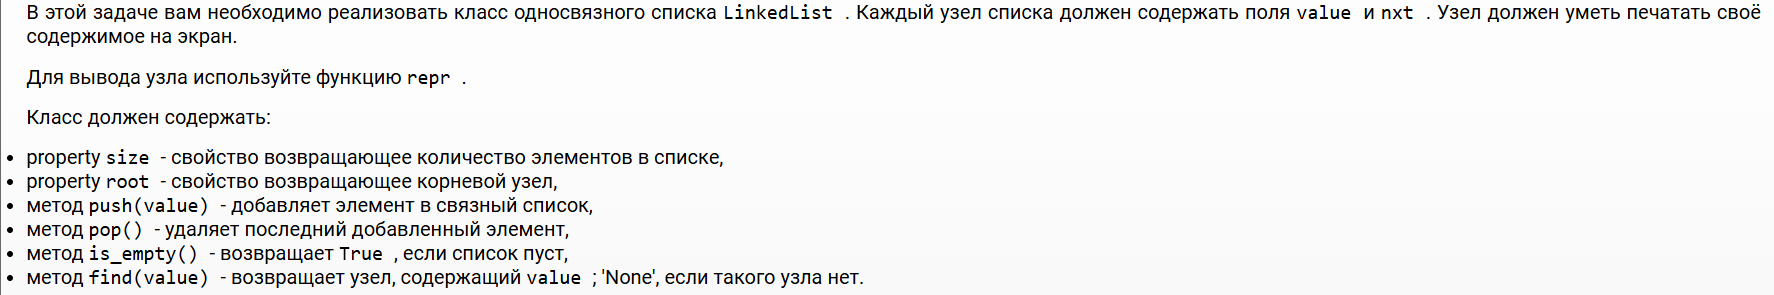